In [3]:
# References: https://starchild.gsfc.nasa.gov/docs/StarChild/questions/redshift.html
# https://www.atnf.csiro.au/outreach/education/senior/cosmicengine/hubble.html
# https://www.pnas.org/content/112/11/3173
# https://www.pnas.org/content/101/1/8


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
df = pd.read_csv("hubble_data.csv")
df.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [10]:
df["distance"]

0     0.032
1     0.034
2     0.214
3     0.263
4     0.275
5     0.275
6     0.450
7     0.500
8     0.500
9     0.630
10    0.800
11    0.900
12    0.900
13    0.900
14    0.900
15    1.000
16    1.100
17    1.100
18    1.400
19    1.700
20    2.000
21    2.000
22    2.000
23    2.000
Name: distance, dtype: float64

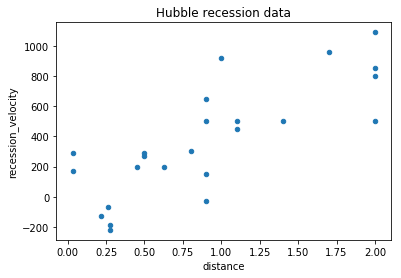

In [11]:
df.plot.scatter(x = 'distance', y = 'recession_velocity', title = 'Hubble recession data')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


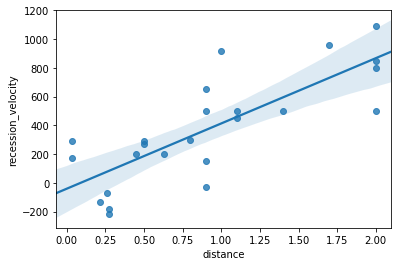

In [12]:
sns.regplot('distance', 'recession_velocity', data=df)

In [14]:
import statsmodels.formula.api as sm
result = sm.ols(formula="recession_velocity ~ distance", data=df).fit()
print(result.params)


Intercept    -40.783649
distance     454.158441
dtype: float64


In [ ]:
# H = 454 is the Hubble constant, measured in km/sec/megaparsec 
#
# Thus 
#
#.     v = H x d ... possibly + constant
#
# Current value of H: about 65 km/sec/mp
# 1 mpc = 3x10^19 km, so H has units of 1/sec
# Therefore 1/H has the units of time, in seconds, and we
# find that 1/H ~ 6.6x10^16 sec - 2 billion years.
# This is an extimate of the age of universe (!!)

# Adjusting for the 7-fold reduction in the value of H, we find that
# age of universe is about 7 times greater, i.e., 14 billion years.


def v(d):
    return 454.16*d - 40.78
v(0.5), v(1.4)

In [ ]:
df

In [ ]:
print(result.summary())